In [1]:
# Train CNN with Synthetic cube


In [2]:

import torch
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.empty_cache()
print(device)


cubes_file = './data/test/cubes.npy'
silhouettes_file = './data/test/sils.npy'
parameters_file = './data/test/params.npy'

target_size = (512, 512)

cubes = np.load(cubes_file)
sils = np.load(silhouettes_file)
params = np.load(parameters_file)

cuda


In [3]:

ratio = 0.9  # 90%training 10%validation
split = int(len(cubes)*0.9)
test_length = 1000

train_im = cubes[:split]  # 90% training
train_sil = sils[:split]
train_param = params[:split]

val_im = cubes[split:]  # remaining ratio for validation
val_sil = sils[split:]
val_param = params[split:]

test_im = cubes[:test_length]
test_sil = sils[:test_length]
test_param = params[:test_length]


In [4]:

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Compose

class CubeDataset(Dataset):
    # write your code
    def __init__(self, images, silhouettes, parameters, transform=None):
        self.images = images.astype(np.uint8)  # our image
        self.silhouettes = silhouettes.astype(np.uint8)  # our related parameter
        self.parameters = parameters.astype(np.float16)
        self.transform = transform

    def __getitem__(self, index):
        # Anything could go here, e.g. image loading from file or a different structure
        # must return image and center
        sel_images = self.images[index]
        sel_sils = self.silhouettes[index]
        sel_params = self.parameters[index]

        if self.transform is not None:
            sel_images = self.transform(sel_images)
            sel_sils = self.transform(sel_sils)

        return sel_images, sel_sils, torch.FloatTensor(sel_params)  # return all parameter in tensor form

    def __len__(self):
        return len(self.images)  # return the length of the dataset

In [5]:

batch_size = 32

transforms = Compose([ToTensor()])
train_dataset = CubeDataset(train_im, train_sil, train_param, transforms)
val_dataset = CubeDataset(val_im, val_sil, val_param, transforms)
test_dataset = CubeDataset(test_im, test_sil, test_param, transforms)

#  Note:
#  DataLoader(Dataset,int,bool,int)
#  dataset (Dataset) – dataset from which to load the data.
#  batch_size (int, optional) – how many samples per batch to load (default: 1)
#  shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).
#  num_workers = n - how many threads in background for efficient loading

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)


number of cube images: torch.Size([32, 3, 512, 512]), number of silhouettes: torch.Size([32, 1, 512, 512]), number of parameters: torch.Size([32, 6])
silhouette has size: (1, 512, 512)
[ 0.          0.          0.          0.5        -0.19995117 -5.5       ]


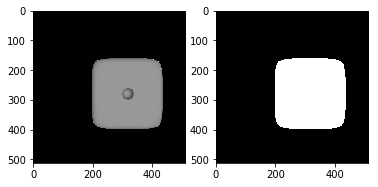

In [30]:

#  try to iterate over the train dataset
import matplotlib.pyplot as plt
fig=plt.figure()

for image, silhouette, parameters in train_dataloader:
    print('number of cube images: {}, number of silhouettes: {}, number of parameters: {}'.format(image.size(), silhouette.size(), parameters.size()))

    im = 22
    image2show = image[im]  # indexing random  one image
    sil2show = silhouette[im]
    param = parameters[im] 

#     print('image has size: {}'.format(image2show.size))
    
    # tensor to numpy:
    image2shownp = image2show.numpy()
    sil2shownp =  sil2show.numpy()
#     .reshape((512, 512,3))  # reshape the torch format to numpy
    print('silhouette has size: {}'.format(np.shape(sil2shownp)))
    
    image2shownp = np.transpose(image2shownp, (1, 2, 0))
    sil2shownp = np.squeeze(np.transpose(sil2shownp,(1, 2, 0))) #squeeze allow to remove the third dimension [512, 512, 1] --> [512, 512]
#     print(image2shownp.shape)
    fig.add_subplot(1, 2, 1)
    plt.imshow(image2shownp)
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(sil2shownp, cmap='gray')
    print (param.numpy())

    break  # break here just to show 1 batch of data
